# IMPORT LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# LOAD DATASETS

In [5]:
transaction_data= pd.read_csv("transaction_data.csv")
purchase_behaviour= pd.read_csv("purchase_behaviour.csv")

In [9]:
# Checking transaction_data
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [10]:
# Checking purchase_behaviour
purchase_behaviour.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


# TOP 3 MOST PROFITABLE PRODUCTS

In [19]:
top_products= transaction_data.groupby(["PROD_NBR", "PROD_NAME"])["TOT_SALES"].sum()
top_3_products= top_products.sort_values(ascending=False).head(3)
print("***TOP 3 MOST PROFITABLE PRODUCTS***\n",top_3_products)

***TOP 3 MOST PROFITABLE PRODUCTS***
 PROD_NBR  PROD_NAME                               
4         Dorito Corn Chp     Supreme 380g            40352.0
14        Smiths Crnkle Chip  Orgnl Big Bag 380g      36367.6
16        Smiths Crinkle Chips Salt & Vinegar 330g    34804.2
Name: TOT_SALES, dtype: float64


# MOST LOYAL CUSTOMERS

In [12]:
customer_loyalty = transaction_data.groupby("LYLTY_CARD_NBR").agg(
    total_transactions=("TXN_ID", "count"),
    total_spent=("TOT_SALES", "sum")
)
customer_loyalty.head()

,total_transactions,total_spent
LYLTY_CARD_NBR,,
1000,1,6.0
1002,1,2.7
1003,2,6.6
1004,1,1.9
1005,1,2.8


In [13]:
# Merging with customer demographics (purchase_behaviour)
customer_loyalty = customer_loyalty.merge(purchase_behaviour, on="LYLTY_CARD_NBR")
loyal_customers = customer_loyalty.sort_values(["total_transactions", "total_spent"], ascending=False).head(10)
loyal_customers.head()

,LYLTY_CARD_NBR,total_transactions,total_spent,LIFESTAGE,PREMIUM_CUSTOMER
42813,162039,18,126.8,OLDER FAMILIES,Mainstream
45905,172032,18,120.1,YOUNG SINGLES/COUPLES,Mainstream
60925,230078,17,138.6,OLDER FAMILIES,Budget
31654,116181,17,117.6,YOUNG FAMILIES,Premium
3686,13138,17,109.0,YOUNG FAMILIES,Mainstream


# CHARACTERISTICS OF MOST LOYAL CUSTOMERS

In [21]:
customer_segments = loyal_customers.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]).size().reset_index(name="count")
print("***CHARACTERISTICS OF MOST LOYAL CUSTOMERS BASED ON LIFESTAGE AND PREMIUM CUSTOMER***\n",customer_segments)

***CHARACTERISTICS OF MOST LOYAL CUSTOMERS BASED ON LIFESTAGE AND PREMIUM CUSTOMER***
                LIFESTAGE PREMIUM_CUSTOMER  count
0         OLDER FAMILIES           Budget      2
1         OLDER FAMILIES       Mainstream      2
2         YOUNG FAMILIES           Budget      2
3         YOUNG FAMILIES       Mainstream      1
4         YOUNG FAMILIES          Premium      2
5  YOUNG SINGLES/COUPLES       Mainstream      1


# DATA VISUALIZATION OF TOP 3 MOST PROFITABLE PRODUCTS

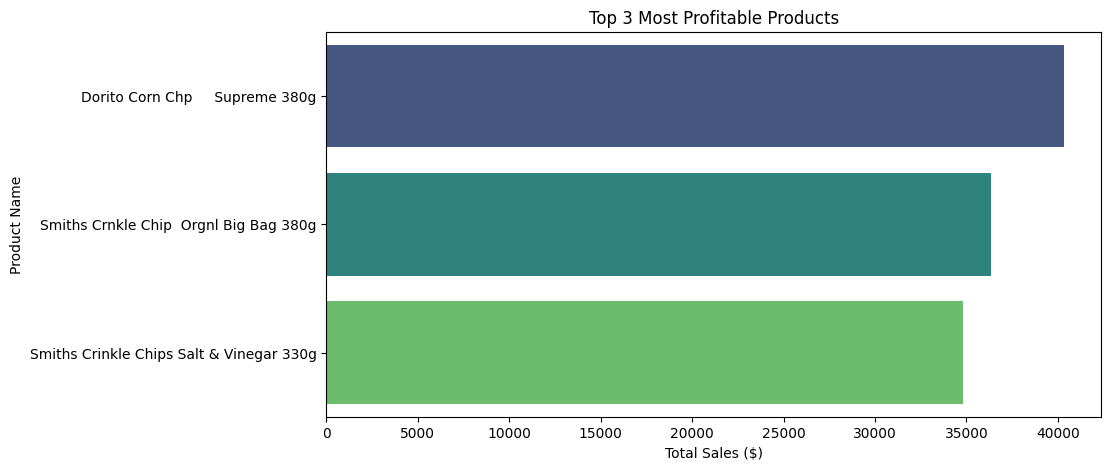

In [15]:
plt.figure(figsize=(10,5))
sns.barplot(x=top_3_products.values, y=top_3_products.index.get_level_values(1), palette="viridis")
plt.xlabel("Total Sales ($)")
plt.ylabel("Product Name")
plt.title("Top 3 Most Profitable Products")
plt.show()

# DATA VISUALIZATION OF CHARACTERSITICS OF MOST LOYAL CUSTOMERS

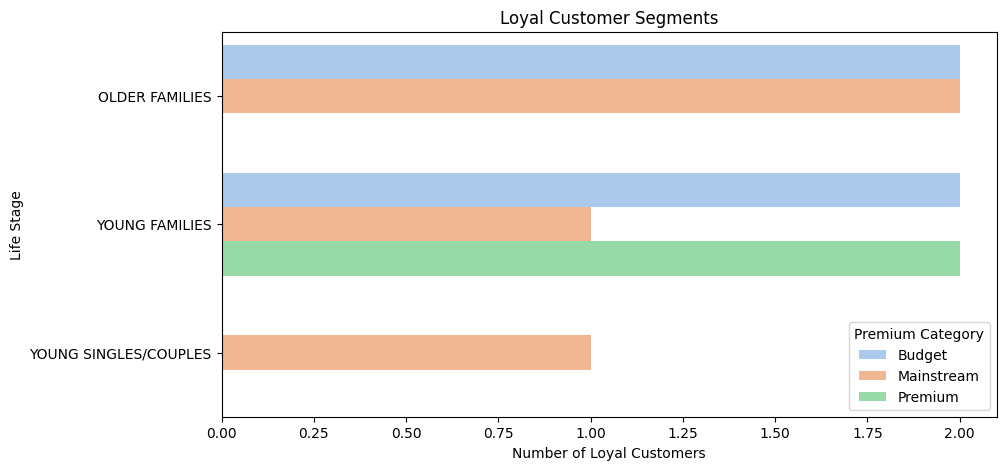

In [16]:
plt.figure(figsize=(10,5))
sns.barplot(data=customer_segments, x="count", y="LIFESTAGE", hue="PREMIUM_CUSTOMER", palette="pastel")
plt.xlabel("Number of Loyal Customers")
plt.ylabel("Life Stage")
plt.title("Loyal Customer Segments")
plt.legend(title="Premium Category")
plt.show()